In [2]:
#case2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/HR_data.csv')

#print header
print(data.head())


   Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  \
0           0   78.663878         76.70   7.480043      67.25      92.48   
1           1   76.540732         76.61   2.584756      69.82      82.33   
2           2   78.173563         77.92   2.681255      72.22      82.80   
3           3   83.073688         83.88   7.363598      69.42      96.12   
4           4   72.281250         72.91   3.193762      64.95      79.98   

   HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  upset  \
0  23048.450       -1.091448    0.369955          -0.7300  ...    1.0   
1  23959.920       -0.245338    0.338732          -0.3600  ...    2.0   
2  20324.605       -0.615922   -0.233047          -0.6300  ...    1.0   
3  24924.300       -0.866610   -0.046021          -0.4650  ...    1.0   
4  23052.100        0.200401   -0.560948          -0.3725  ...    3.0   

   hostile  alert  ashamed  inspired  nervous  attentive  afraid  active  \
0      1.0    2.0      1.0  

In [7]:
data.columns

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [10]:
#count unique entries of individuals for each cohort
cohort_counts = data.groupby('Cohort')['Individual'].nunique()
print(cohort_counts)


Cohort
D1_1    8
D1_2    6
D1_3    4
D1_4    4
D1_5    2
D1_6    2
Name: Individual, dtype: int64


Frustrated   0.0   1.0   2.0   3.0   4.0   5.0  6.0  7.0  8.0
Cohort                                                       
D1_1         8.0  18.0  24.0  13.0  17.0  11.0  3.0  2.0  NaN
D1_2        21.0  27.0   7.0   3.0   6.0   3.0  2.0  NaN  3.0
D1_3        12.0   8.0  12.0   7.0   4.0   2.0  2.0  1.0  NaN
D1_4        32.0   5.0   8.0   2.0   NaN   NaN  NaN  1.0  NaN
D1_5         1.0   2.0   9.0   1.0   1.0   2.0  3.0  4.0  1.0
D1_6        13.0   5.0   2.0   2.0   2.0   NaN  NaN  NaN  NaN


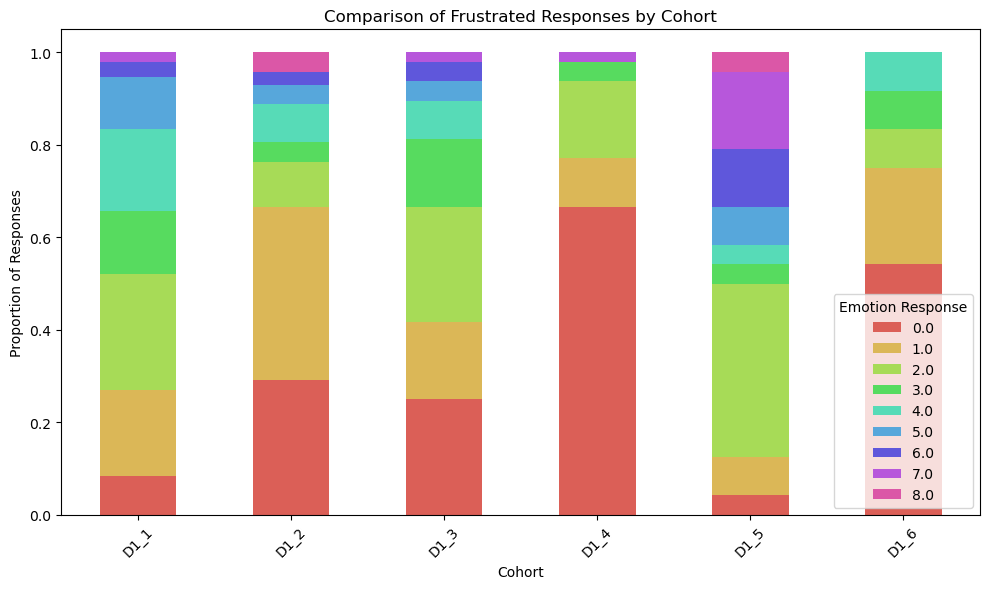

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

emotion = 'Frustrated'
cohort_emotions = data.groupby('Cohort')[emotion].value_counts().unstack()
print(cohort_emotions)

# Use a Seaborn color palette (e.g., HUSL) and assign to variable
palette = sns.color_palette("hls", len(cohort_emotions.columns))

# Normalize counts to show proportions
cohort_emotions_normalized = cohort_emotions.div(cohort_emotions.sum(axis=1), axis=0)

# Plot with custom color palette
cohort_emotions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)

plt.title(f'Comparison of {emotion} Responses by Cohort')
plt.xlabel('Cohort')
plt.ylabel('Proportion of Responses')
plt.legend(title='Emotion Response')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Frustrated   0.0   1.0   2.0   3.0   4.0   5.0  6.0  7.0  8.0
Cohort                                                       
D1_1         8.0  18.0  24.0  13.0  17.0  11.0  3.0  2.0  NaN
D1_2        21.0  27.0   7.0   3.0   6.0   3.0  2.0  NaN  3.0
D1_3        12.0   8.0  12.0   7.0   4.0   2.0  2.0  1.0  NaN
D1_4        32.0   5.0   8.0   2.0   NaN   NaN  NaN  1.0  NaN
D1_5         1.0   2.0   9.0   1.0   1.0   2.0  3.0  4.0  1.0
D1_6        13.0   5.0   2.0   2.0   2.0   NaN  NaN  NaN  NaN


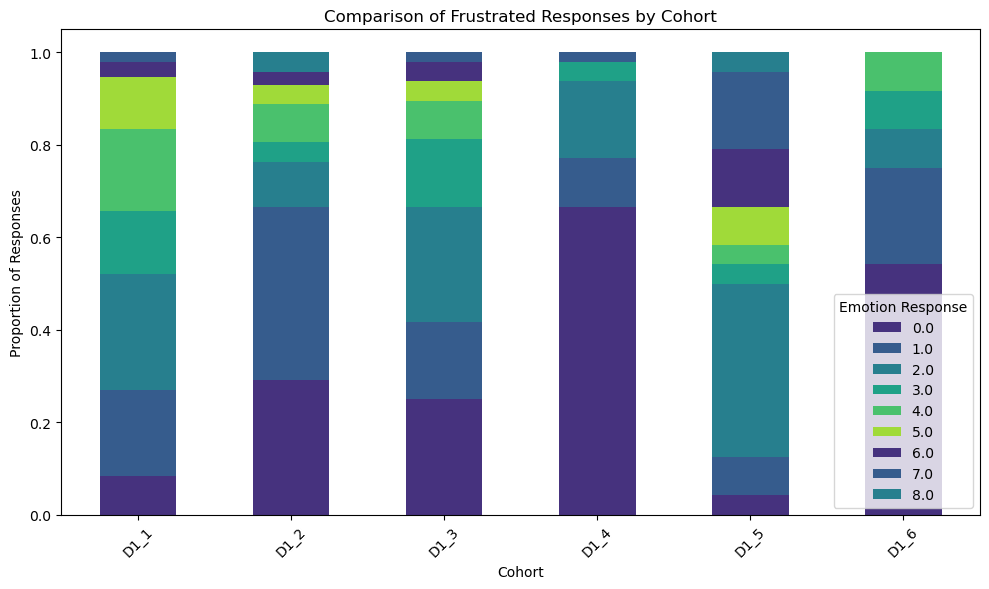

In [34]:
#print emotion responses for each cohort
emotion = 'Frustrated'
cohort_emotions = data.groupby('Cohort')[emotion].value_counts().unstack()
print(cohort_emotions)

#plot to compare cohorts
#cohort_emotions.plot(kind='bar', stacked=True, figsize=(10, 6))
#use palette from UV to violet such that emotions are treated as a gradient
import seaborn as sns
sns.color_palette("husl", 8)
#normalize the counts to show proportions
cohort_emotions_normalized = cohort_emotions.div(cohort_emotions.sum(axis=1), axis=0)
cohort_emotions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.title(f'Comparison of {emotion} Responses by Cohort')
plt.xlabel('Cohort')
plt.ylabel('Proportion of Responses')
plt.legend(title='Emotion Response')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('cohort_emotions.png')
plt.show()

In [16]:
data['ashamed'].value_counts()

ashamed
1.0    259
2.0     41
3.0      8
4.0      4
Name: count, dtype: int64

In [ ]:
#number of persons in each cohort, count
cohort_counts = data.groupby('Cohort')['Cohort']
print(cohort_counts)

Cohort
D1_1    96
D1_2    72
D1_3    48
D1_4    48
D1_5    24
D1_6    24
Name: Cohort, dtype: int64


In [70]:
print(data.columns)

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [57]:
#show missing value in features at EDA_TD_P_RT and EDA_TD_P_ReT
print(data[data.isna().any(axis=1)])
#just drop this row
data = data.dropna()
print(data.head())

     Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  \
104         104   83.758589        83.075   3.465654      78.33      93.55   
120         120   64.966797        62.725   7.655497      57.32      89.38   
122         122   69.815920        72.050   4.761262      59.43      75.38   
125         125   69.222492        65.350  10.880043      57.62      94.38   
272         272   84.923904        86.950   7.378264      67.25      98.45   

     HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  upset  \
104  27219.015        1.316130    1.257816          -0.4300  ...    1.0   
120  19803.415        3.132358    1.991410          -0.9325  ...    2.0   
122  20807.725       -0.755575   -0.801089          -0.5125  ...    2.0   
125  21041.055       -0.330384    1.044434          -0.7600  ...    3.0   
272  21224.175       -0.716559   -0.555002          -3.3660  ...    1.0   

     hostile  alert  ashamed  inspired  nervous  attentive  afraid  active  \
10

In [58]:
#from column Round in features, leftstrip the string 'round_' and convert to int
data['Round'] = data['Round'].str.lstrip('round_').astype(int)
#same with column Phase, lefstrip 'phase' and convert to int
data['Phase'] = data['Phase'].str.lstrip('phase').astype(int)
print(data.head())

   Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  \
0           0   78.663878         76.70   7.480043      67.25      92.48   
1           1   76.540732         76.61   2.584756      69.82      82.33   
2           2   78.173563         77.92   2.681255      72.22      82.80   
3           3   83.073688         83.88   7.363598      69.42      96.12   
4           4   72.281250         72.91   3.193762      64.95      79.98   

   HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  upset  \
0  23048.450       -1.091448    0.369955          -0.7300  ...    1.0   
1  23959.920       -0.245338    0.338732          -0.3600  ...    2.0   
2  20324.605       -0.615922   -0.233047          -0.6300  ...    1.0   
3  24924.300       -0.866610   -0.046021          -0.4650  ...    1.0   
4  23052.100        0.200401   -0.560948          -0.3725  ...    3.0   

   hostile  alert  ashamed  inspired  nervous  attentive  afraid  active  \
0      1.0    2.0      1.0  

In [59]:
#check where is NaN
print(data.isna().sum())

Unnamed: 0      0
HR_TD_Mean      0
HR_TD_Median    0
HR_TD_std       0
HR_TD_Min       0
               ..
nervous         0
attentive       0
afraid          0
active          0
determined      0
Length: 68, dtype: int64


In [60]:
#Seperate the data into two groups, features and response (emotions)
features = data.iloc[:, :-12]
response = data.iloc[:, -12:]
print(features.head())


   Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  \
0           0   78.663878         76.70   7.480043      67.25      92.48   
1           1   76.540732         76.61   2.584756      69.82      82.33   
2           2   78.173563         77.92   2.681255      72.22      82.80   
3           3   83.073688         83.88   7.363598      69.42      96.12   
4           4   72.281250         72.91   3.193762      64.95      79.98   

   HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  \
0  23048.450       -1.091448    0.369955          -0.7300  ...   
1  23959.920       -0.245338    0.338732          -0.3600  ...   
2  20324.605       -0.615922   -0.233047          -0.6300  ...   
3  24924.300       -0.866610   -0.046021          -0.4650  ...   
4  23052.100        0.200401   -0.560948          -0.3725  ...   

   EDA_TD_T_Slope_max  EDA_TD_T_Slope_mean  EDA_TD_T_Slope  EDA_TD_P_Peaks  \
0            0.000138             0.000010    1.036040e-05          

(307, 2)
[[-3.35937617  0.75282994]
 [-3.51069586 -0.39671551]
 [-4.11850194 -0.29530979]
 [-3.69811108  0.95097154]
 [-3.82869069 -0.29095702]]


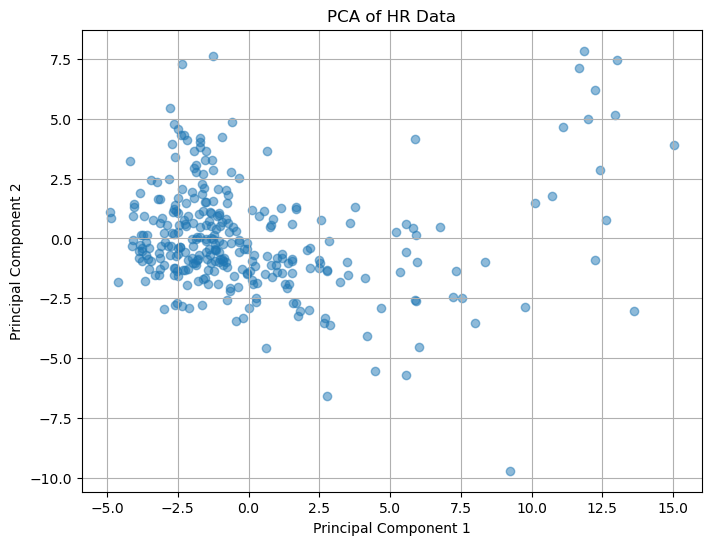

In [75]:
#PCA on features

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


pca = PCA(n_components=2)
pca.fit(features_scaled)

features_pca = pca.transform(features_scaled)
print(features_pca.shape)
print(features_pca[:5])
#Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.5)
plt.title('PCA of HR Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()



(307, 2)
[[-3.24207041  0.43507986]
 [-3.49609533 -0.5261286 ]
 [-4.04976783 -0.51017195]
 [-3.59088264  1.19043622]
 [-3.82492366 -0.88878307]]


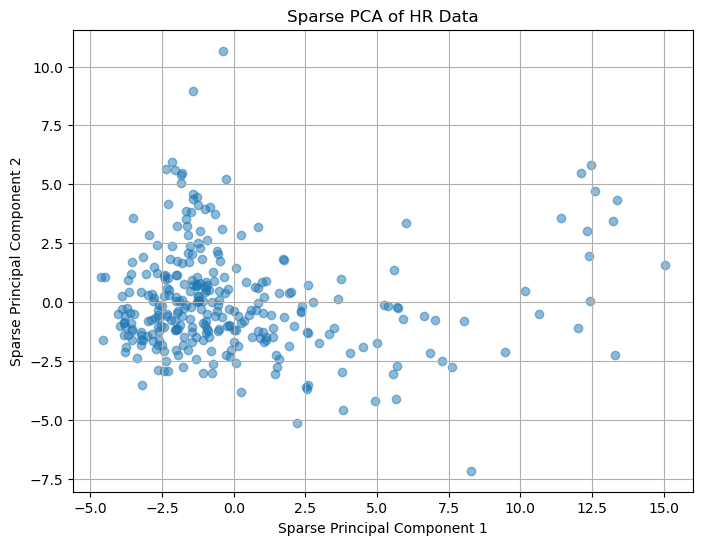

In [76]:
#sPCA on features
from sklearn.decomposition import SparsePCA
#Apply Sparse PCA
sparse_pca = SparsePCA(n_components=2, random_state=42)
sparse_pca.fit(features_scaled)
features_sparse_pca = sparse_pca.transform(features_scaled)
print(features_sparse_pca.shape)
print(features_sparse_pca[:5])
#Plot the Sparse PCA results
plt.figure(figsize=(8, 6))
plt.scatter(features_sparse_pca[:, 0], features_sparse_pca[:, 1], alpha=0.5)
plt.title('Sparse PCA of HR Data')
plt.xlabel('Sparse Principal Component 1')
plt.ylabel('Sparse Principal Component 2')
plt.grid()
plt.show()


(307, 2)
[[-0.72132724 -0.6118364 ]
 [-0.30245438 -0.89289972]
 [-0.41968936 -1.01105313]
 [-0.84067919 -0.64734669]
 [-0.38389119 -0.94342612]]


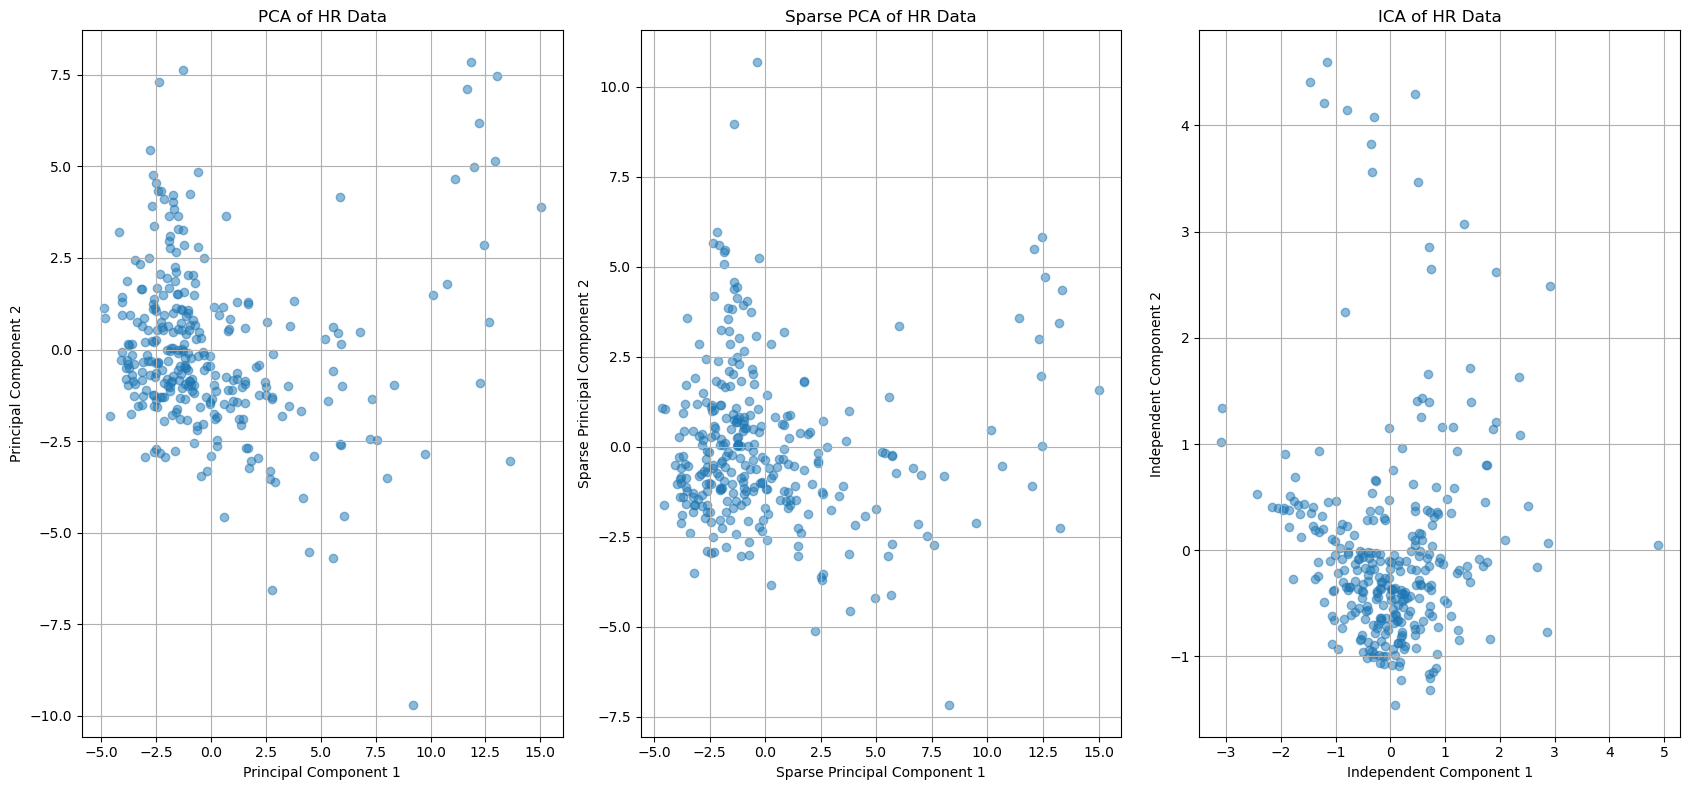

In [77]:
#PCA and sPCA and ICA in same plot
from sklearn.decomposition import FastICA
#Apply ICA
ica = FastICA(n_components=2, random_state=42)
ica.fit(features_scaled)
features_ica = ica.transform(features_scaled)
print(features_ica.shape)
print(features_ica[:5])
#Plot the PCA, Sparse PCA and ICA results
plt.figure(figsize=(17, 8))
#plot vertically instead of horizontally
plt.subplot(1, 3, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.5)
plt.title('PCA of HR Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.subplot(1, 3, 2)
plt.scatter(features_sparse_pca[:, 0], features_sparse_pca[:, 1], alpha=0.5)
plt.title('Sparse PCA of HR Data')
plt.xlabel('Sparse Principal Component 1')
plt.ylabel('Sparse Principal Component 2')
plt.grid()
plt.subplot(1, 3, 3)
plt.scatter(features_ica[:, 0], features_ica[:, 1], alpha=0.5)
plt.title('ICA of HR Data')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.grid()
plt.tight_layout()
plt.show()


In [78]:
response.columns

Index(['Frustrated', 'Cohort', 'upset', 'hostile', 'alert', 'ashamed',
       'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined'],
      dtype='object')

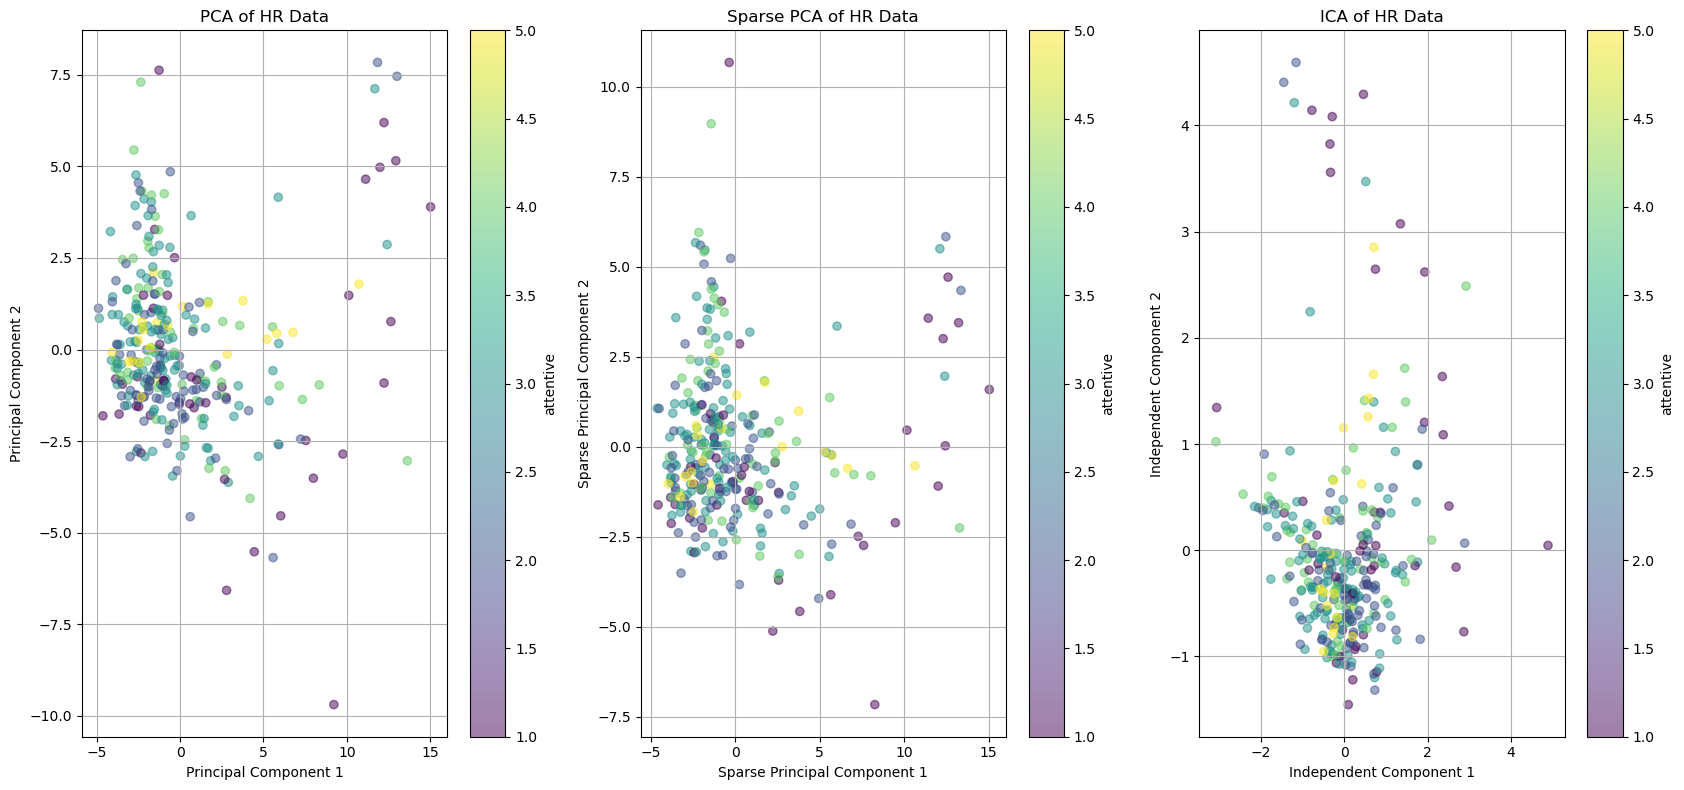

In [79]:
#plot again but color by some response variable

emotion = 'attentive'
col_var = response[emotion]

plt.figure(figsize=(17, 8))
plt.subplot(1, 3, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=col_var, cmap='viridis', alpha=0.5)
plt.title('PCA of HR Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label=emotion)
plt.grid()
plt.subplot(1, 3, 2)
plt.scatter(features_sparse_pca[:, 0], features_sparse_pca[:, 1], c=col_var, cmap='viridis', alpha=0.5)
plt.title('Sparse PCA of HR Data')
plt.xlabel('Sparse Principal Component 1')
plt.ylabel('Sparse Principal Component 2')
plt.colorbar(label=emotion)
plt.grid()
plt.subplot(1, 3, 3)
plt.scatter(features_ica[:, 0], features_ica[:, 1], c=col_var, cmap='viridis', alpha=0.5)
plt.title('ICA of HR Data')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.colorbar(label=emotion)
plt.grid()
plt.tight_layout()
plt.show()